In [ ]:
import matplotlib.pyplot as plt
import re

# 定义读取和解析日志文件的函数
def parse_log_file(log_file_path):
    accuracies_by_hash_bits = {
        "16": [],
        "32": [],
        "64": [],
        "128": []
    }
    
    # 读取日志文件
    with open(log_file_path, 'r') as file:
        log_content = file.readlines()
    
    current_hash_bits = None
    
    # 解析日志内容
    for line in log_content:
        if "Start Training with hash_bits:" in line:
            current_hash_bits = line.split(": ")[-1].strip()
        elif "Test Accuracy:" in line:
            accuracy = float(line.split(": ")[-1].rstrip('%\n'))
            if current_hash_bits in accuracies_by_hash_bits:
                accuracies_by_hash_bits[current_hash_bits].append(accuracy)
    
    return accuracies_by_hash_bits

# 绘制准确率折线图的函数
def plot_accuracies(accuracies_by_hash_bits):
    plt.figure(figsize=(10, 7))
    for hash_bits, accuracies in accuracies_by_hash_bits.items():
        epochs = range(1, len(accuracies) + 1)
        plt.plot(epochs, accuracies, marker='o', linestyle='-', label=f'Hash Bits: {hash_bits}')
    
    plt.title('Test Accuracy over Epochs for Different Hash Bits')
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()

# 指定日志文件路径
log_file_path = './logs/resnet34_test_hashbits.log'

# 解析日志文件
accuracies_by_hash_bits = parse_log_file(log_file_path)

# 绘制准确率折线图
plot_accuracies(accuracies_by_hash_bits)


In [ ]:
import matplotlib.pyplot as plt
import re

# 定义读取和解析日志文件的函数
def parse_log_file(log_file_path):
    accuracies_by_hash_bits = {
        "32": [],
        "128": [],
    
    }
    
    # 读取日志文件
    with open(log_file_path, 'r') as file:
        log_content = file.readlines()
    
    current_hash_bits = None
    
    # 解析日志内容
    for line in log_content:
        if "Start Training with: Resize_" in line:
            current_hash_bits = line.split(": Resize_")[-1].strip()
        elif "Test Accuracy:" in line:
            accuracy = float(line.split(": ")[-1].rstrip('%\n'))
            if current_hash_bits in accuracies_by_hash_bits:
                accuracies_by_hash_bits[current_hash_bits].append(accuracy)
    
    return accuracies_by_hash_bits

# 绘制准确率折线图的函数
def plot_accuracies(accuracies_by_hash_bits):
    plt.figure(figsize=(10, 7))
    for hash_bits, accuracies in accuracies_by_hash_bits.items():
        epochs = range(1, len(accuracies) + 1)
        plt.plot(epochs, accuracies, marker='o', linestyle='-', label=f'Img size: {hash_bits}')
    
    plt.title('Test Accuracy over Epochs for Different Image Size')
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()

# 指定日志文件路径
log_file_path = './logs/draw.log'

# 解析日志文件
accuracies_by_hash_bits = parse_log_file(log_file_path)

# 绘制准确率折线图
plot_accuracies(accuracies_by_hash_bits)


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# 加载stats_matrix
stats_matrix_path = './sta/stats_matrix.pt'  # 确保这个路径与你保存文件的路径匹配
stats_matrix = torch.load(stats_matrix_path)
#stats_matrix = (stats_matrix - stats_matrix.min()) / (stats_matrix.max() - stats_matrix.min())

stats_matrix/=1000
# 设置绘图样式
sns.set()

# 对于每个epoch绘制热力图
for epoch in range(stats_matrix.size(0)):
    plt.figure(figsize=(30, 8))  # 可以根据需要调整图片大小
    sns.heatmap(stats_matrix[epoch].cpu().numpy(), annot=True, fmt=".1f", cmap="viridis")
    plt.title(f'Epoch {epoch+1}')
    plt.xlabel('Hash Bits')
    plt.ylabel('Class Labels')
    plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# 加载stats_matrix
stats_matrix_path = './sta/stats_matrix_true.pt'  # 确保这个路径与你保存文件的路径匹配
stats_matrix = torch.load(stats_matrix_path)
#stats_matrix = (stats_matrix - stats_matrix.min()) / (stats_matrix.max() - stats_matrix.min())

stats_matrix/=1000
# 设置绘图样式
sns.set()

# 对于每个epoch绘制热力图
for epoch in range(stats_matrix.size(0)):
    plt.figure(figsize=(30, 8))  # 可以根据需要调整图片大小
    sns.heatmap(stats_matrix[epoch].cpu().numpy(), annot=True, fmt=".1f", cmap="viridis")
    plt.title(f'Epoch {epoch+1}')
    plt.xlabel('Hash Bits')
    plt.ylabel('Class Labels')
    plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plot_stats_for_epoch(epoch, stats_matrix_path='./sta/distance_matrix.pt'):
    stats_matrix = torch.load(stats_matrix_path)
    distances = torch.arange(stats_matrix.shape[1])

    
    for epoch in range(stats_matrix.size(0)):
        clean_samples = stats_matrix[epoch, :, 0]
        noise_samples = stats_matrix[epoch, :, 1]
        plt.figure(figsize=(12, 6))
        plt.bar(distances, clean_samples, color='blue', label='Clean Samples')
        plt.bar(distances, noise_samples, bottom=clean_samples, color='red', label='Noise Samples')
        plt.xlabel('Distance')
        plt.ylabel('Number of Samples')
        plt.title(f'Statistics for Epoch {epoch+1}')
        plt.legend()
        plt.show()

# Example usage
plot_stats_for_epoch(0)

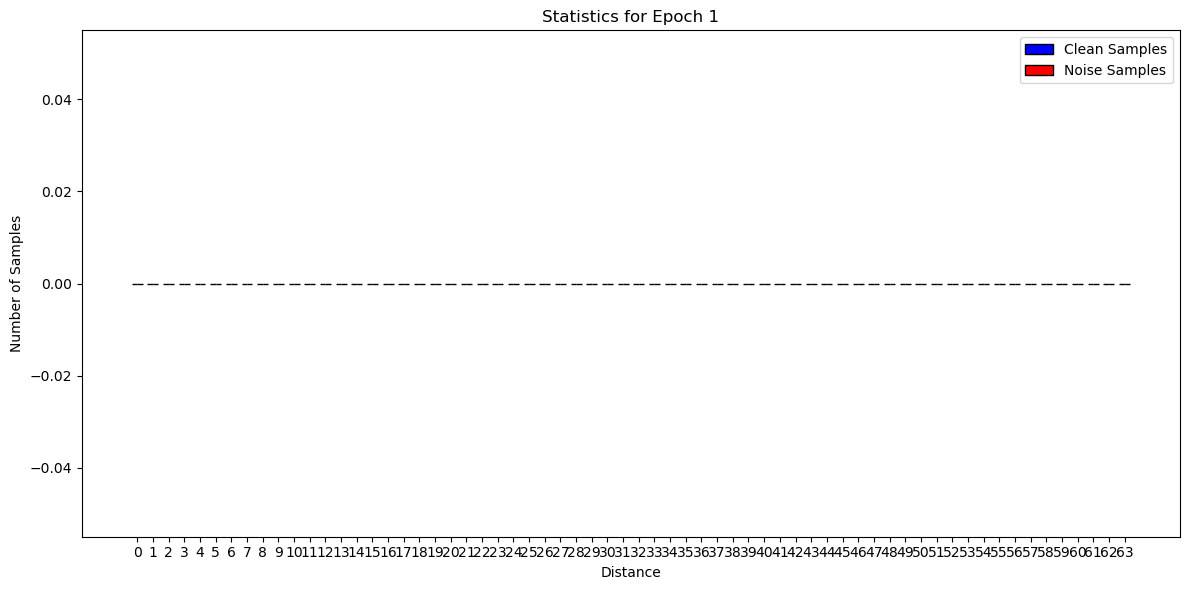

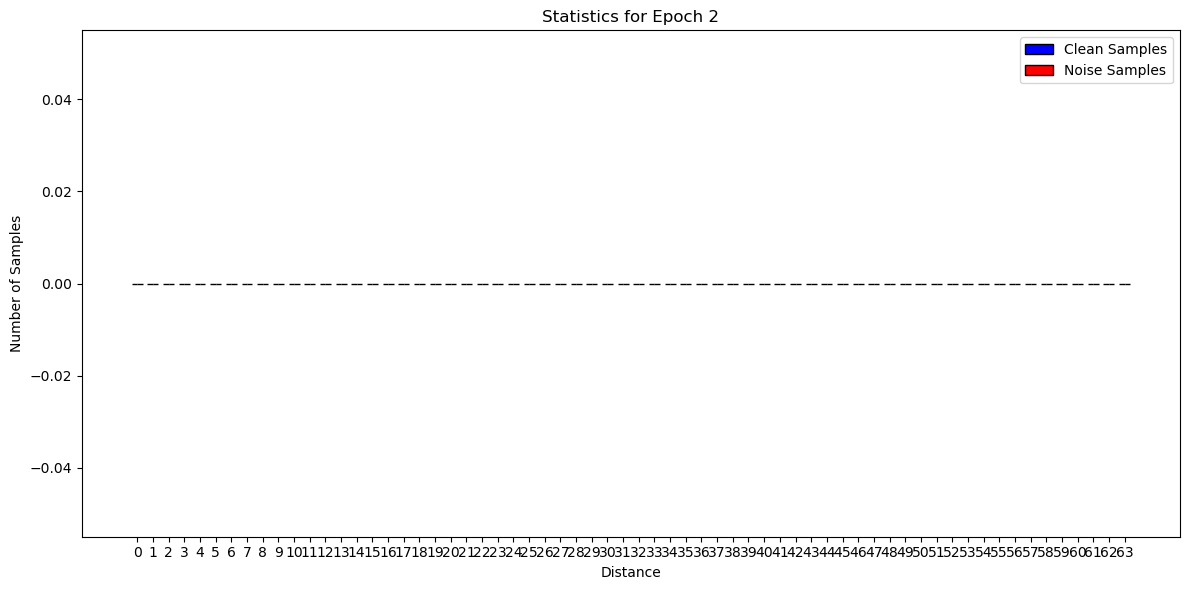

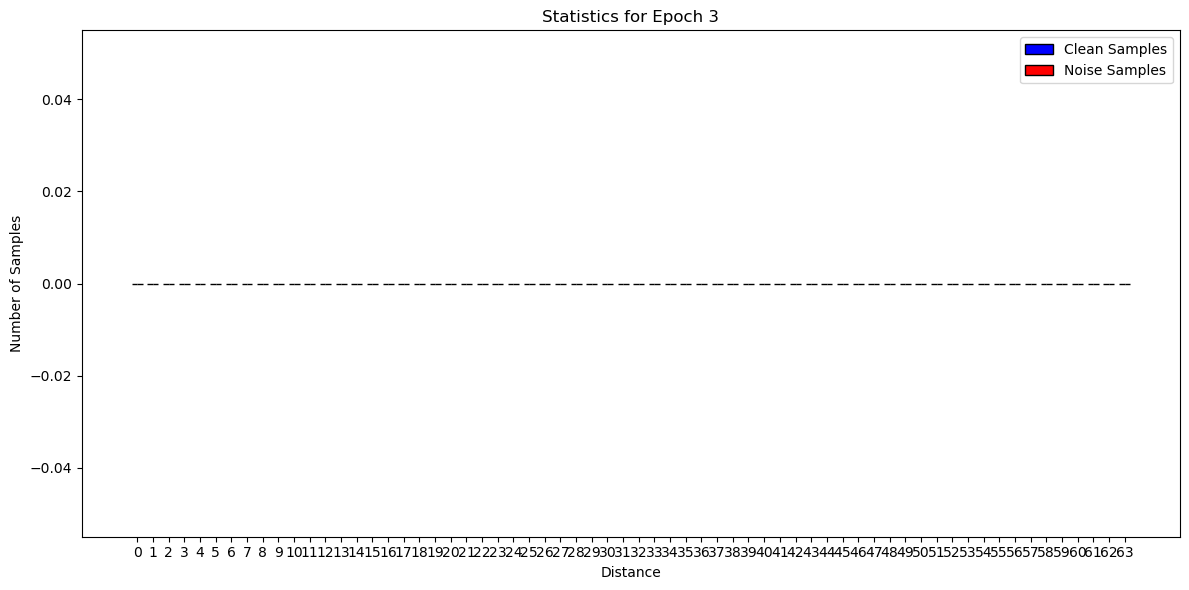

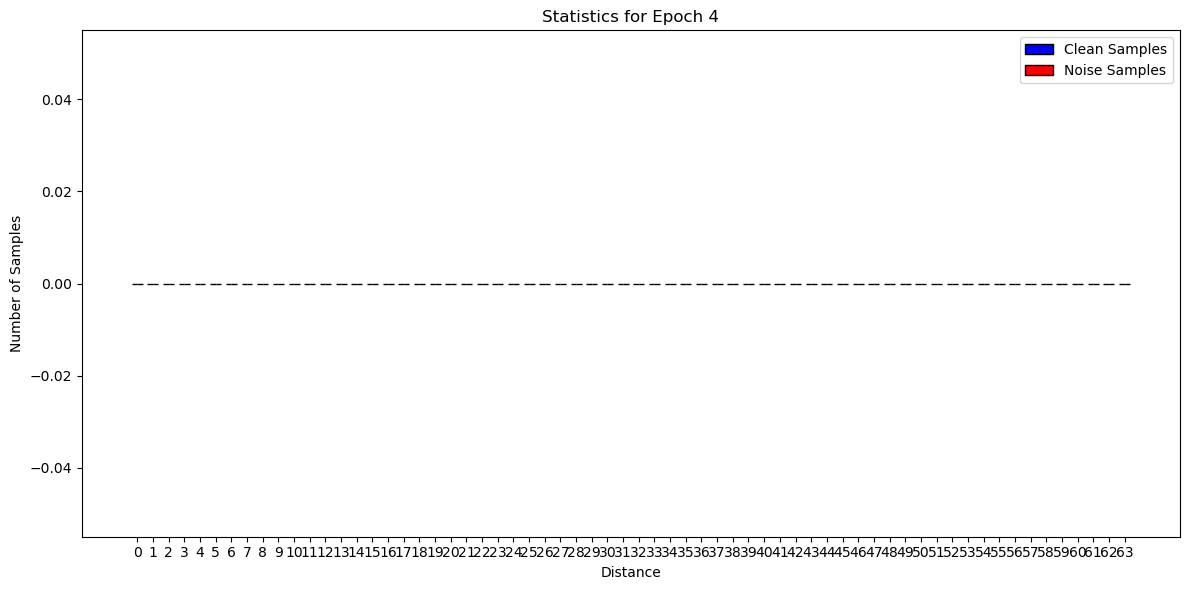

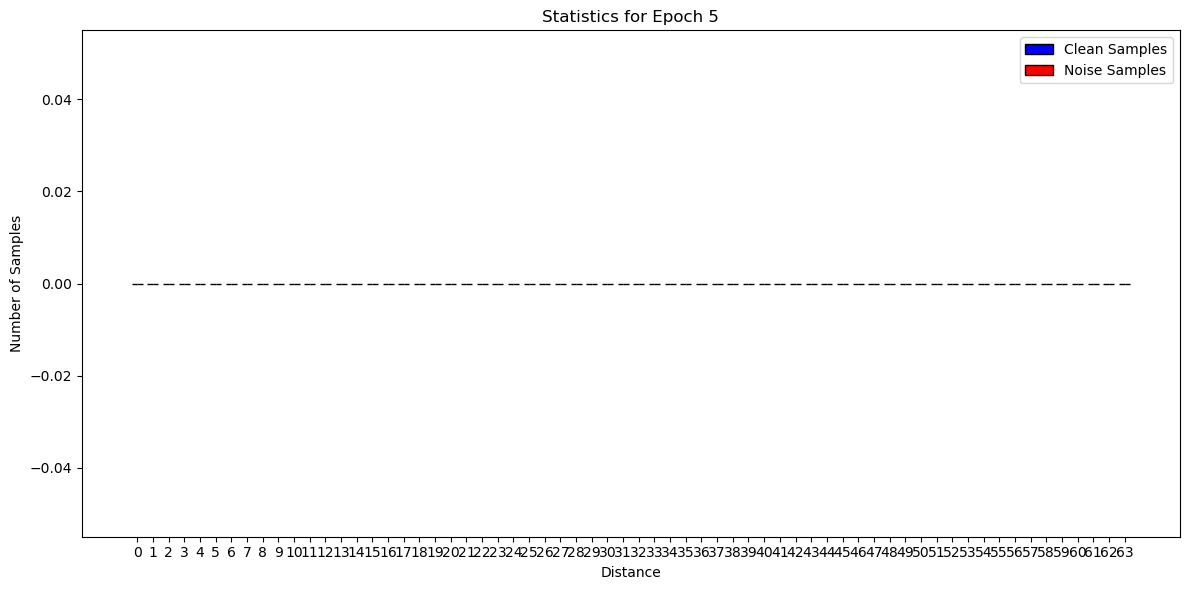

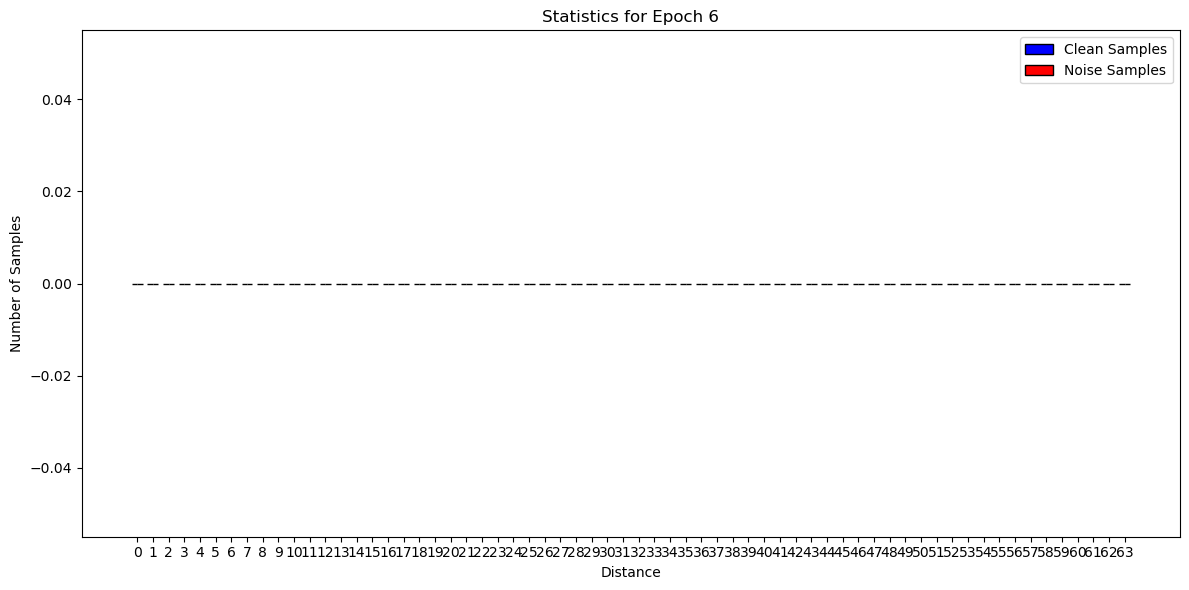

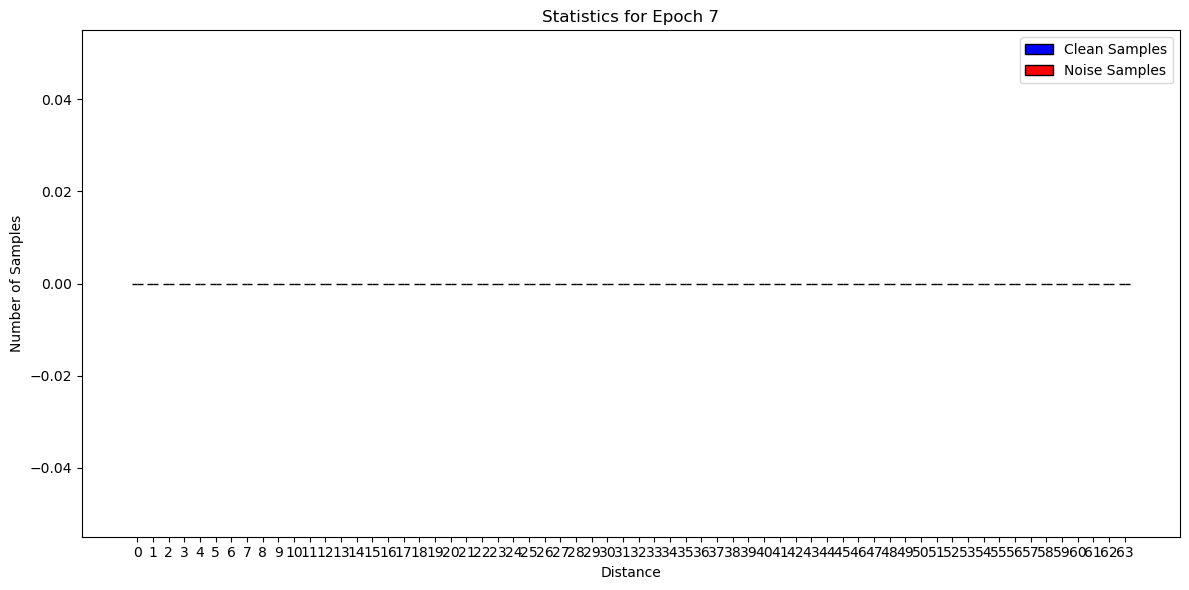

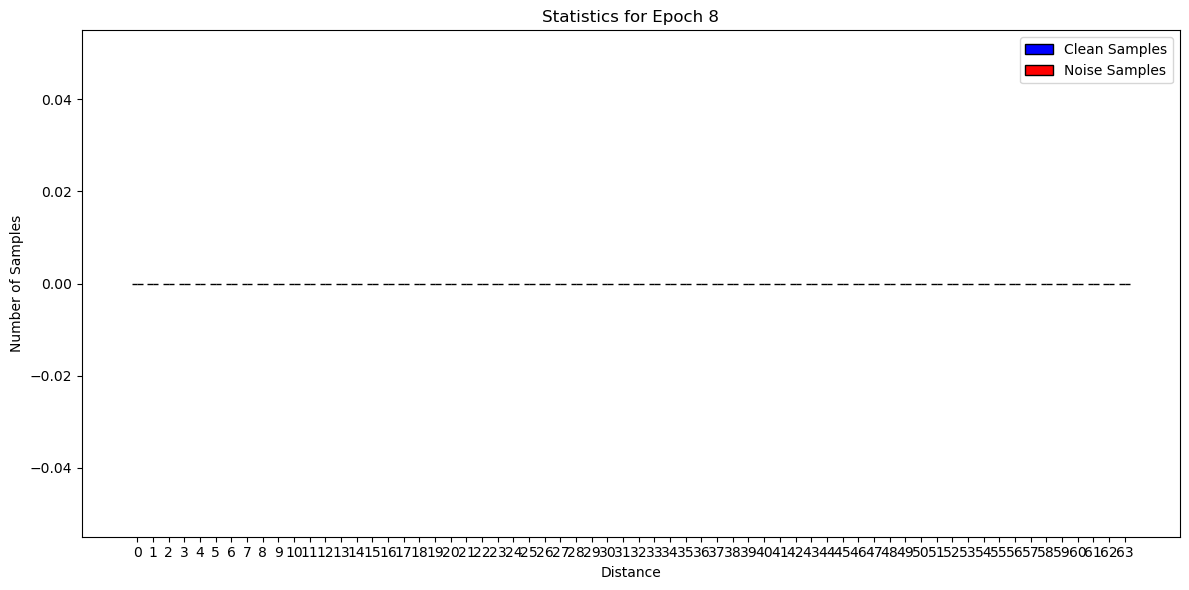

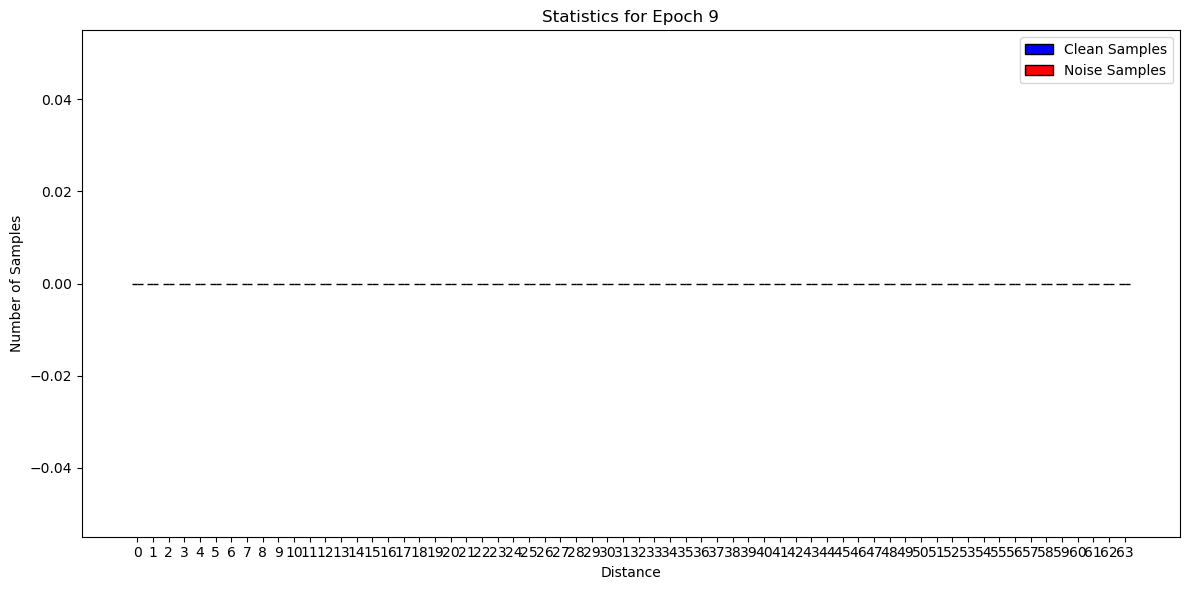

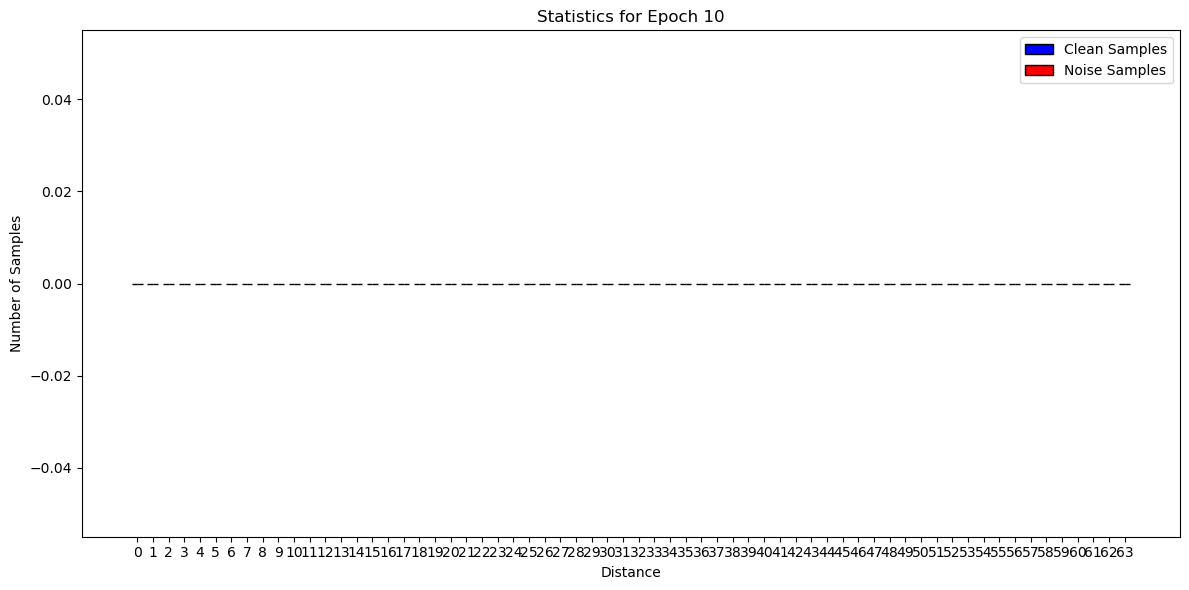

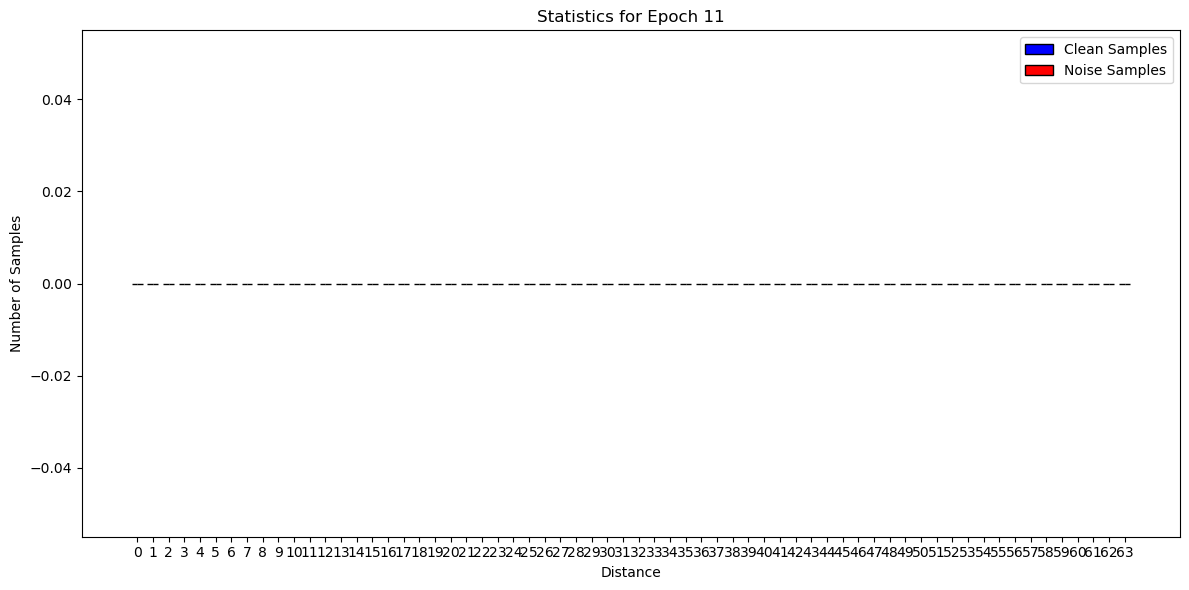

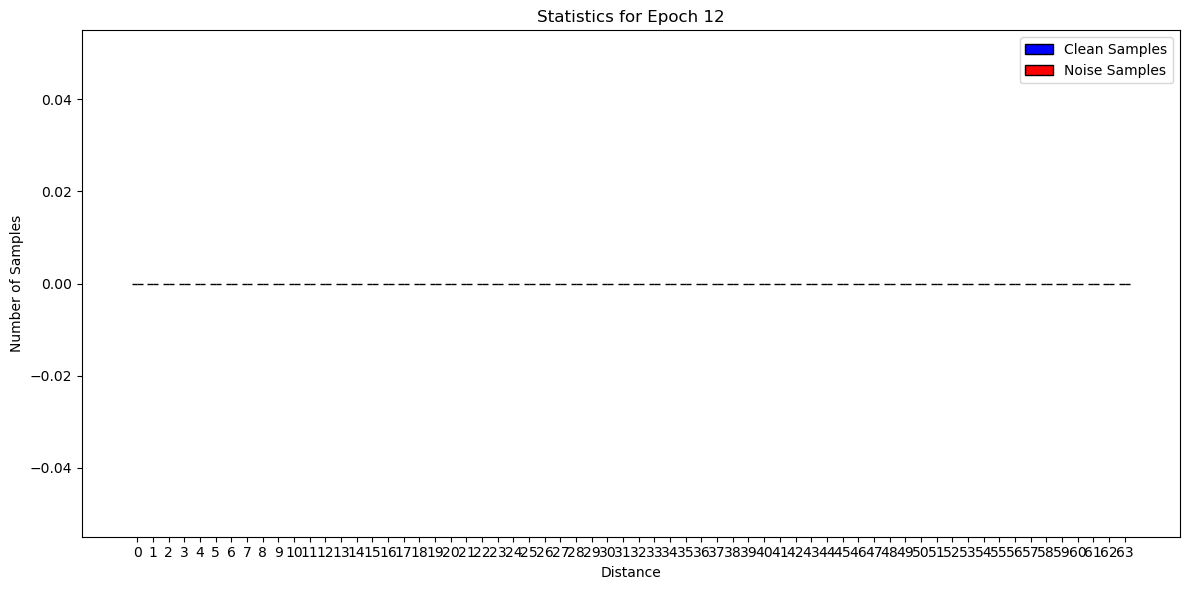

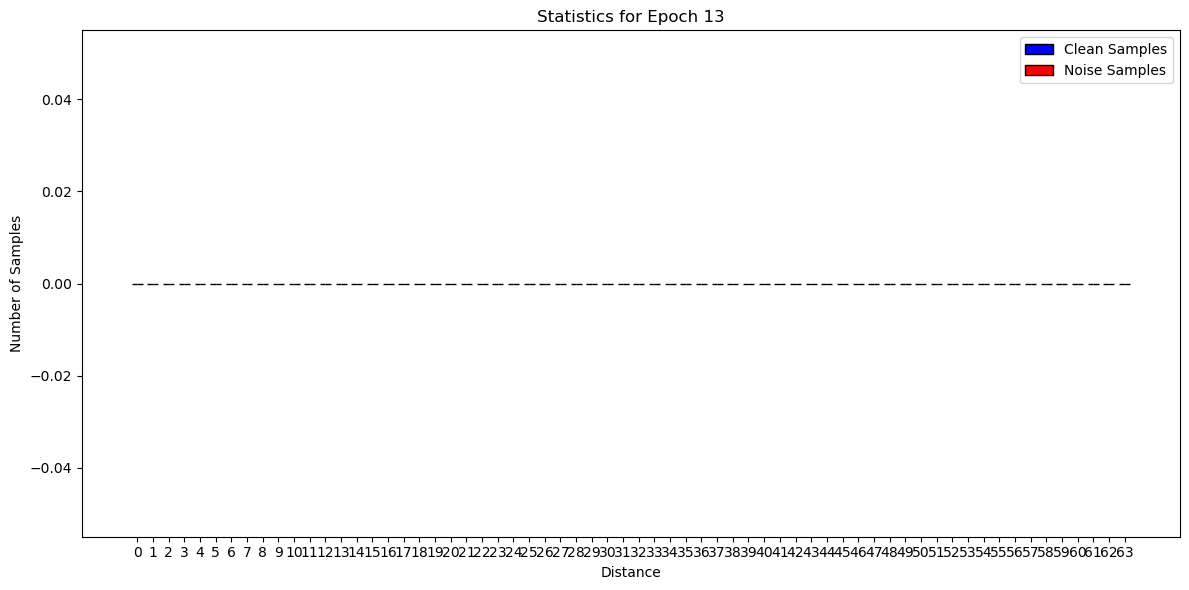

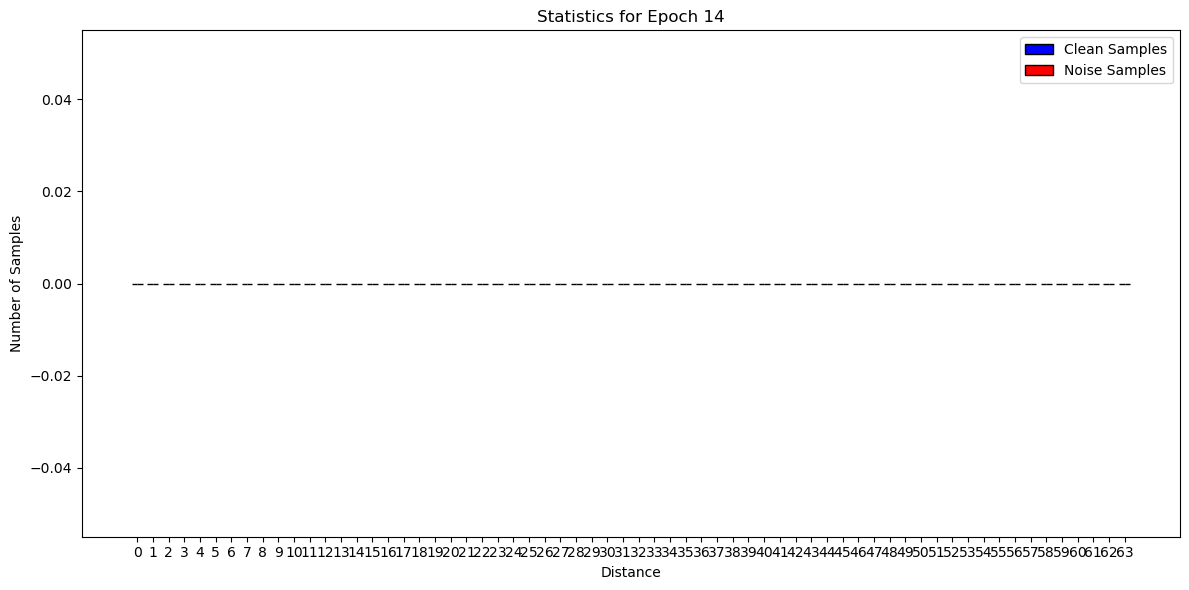

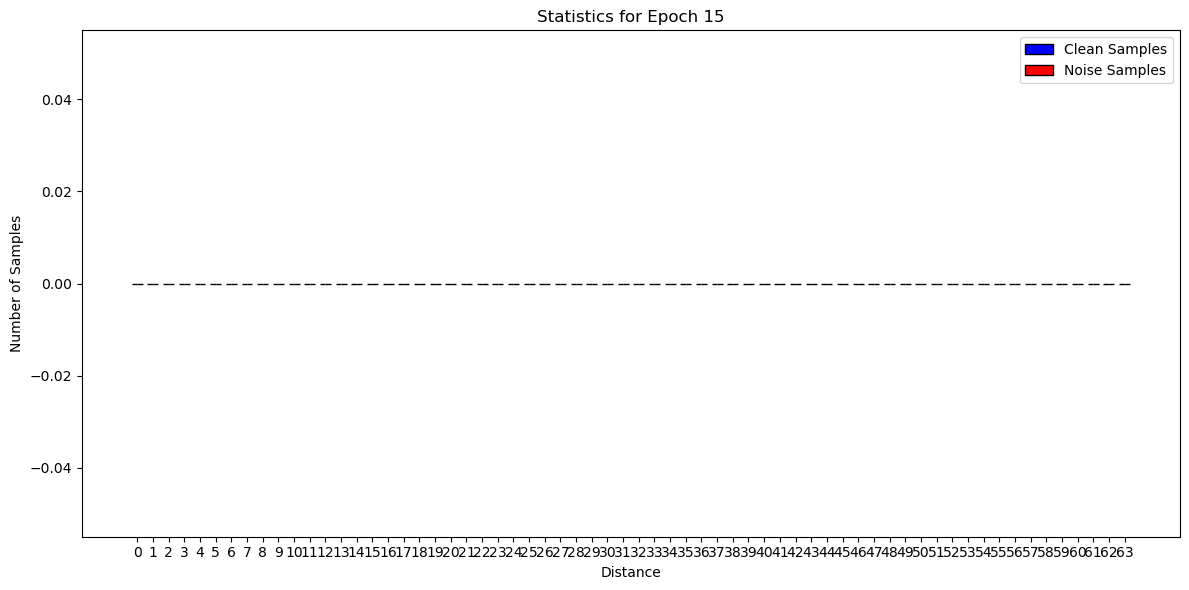

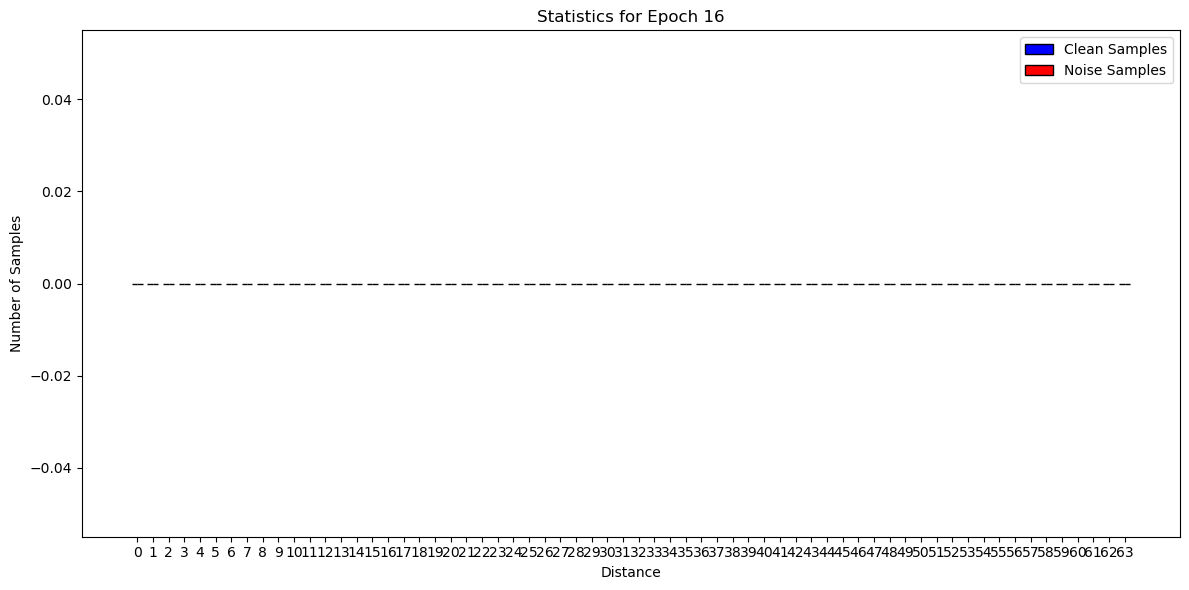

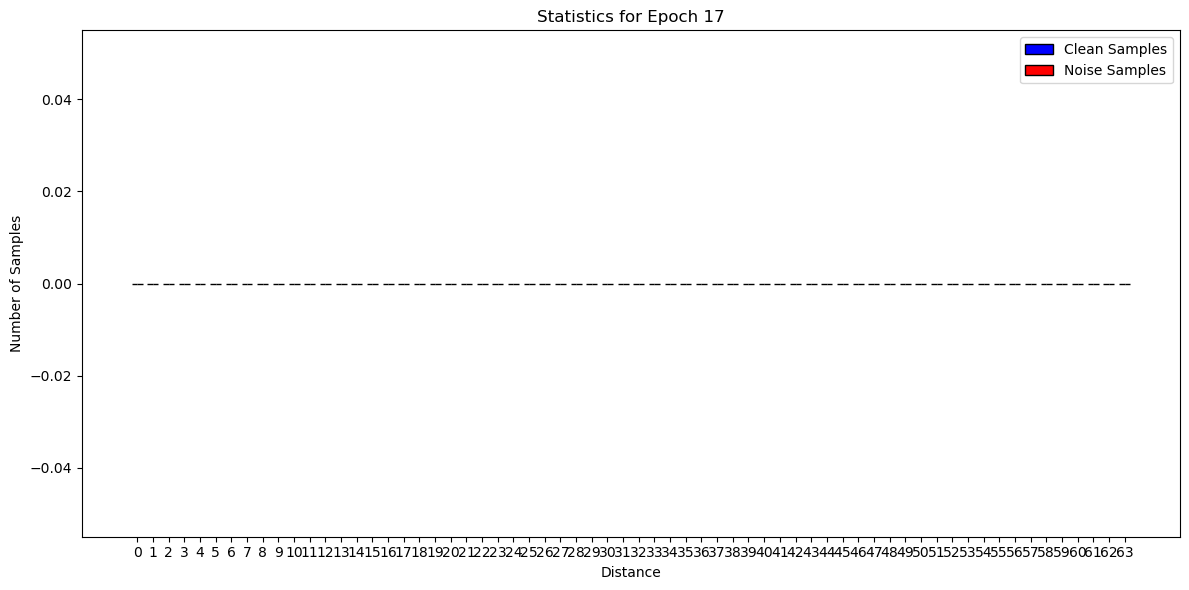

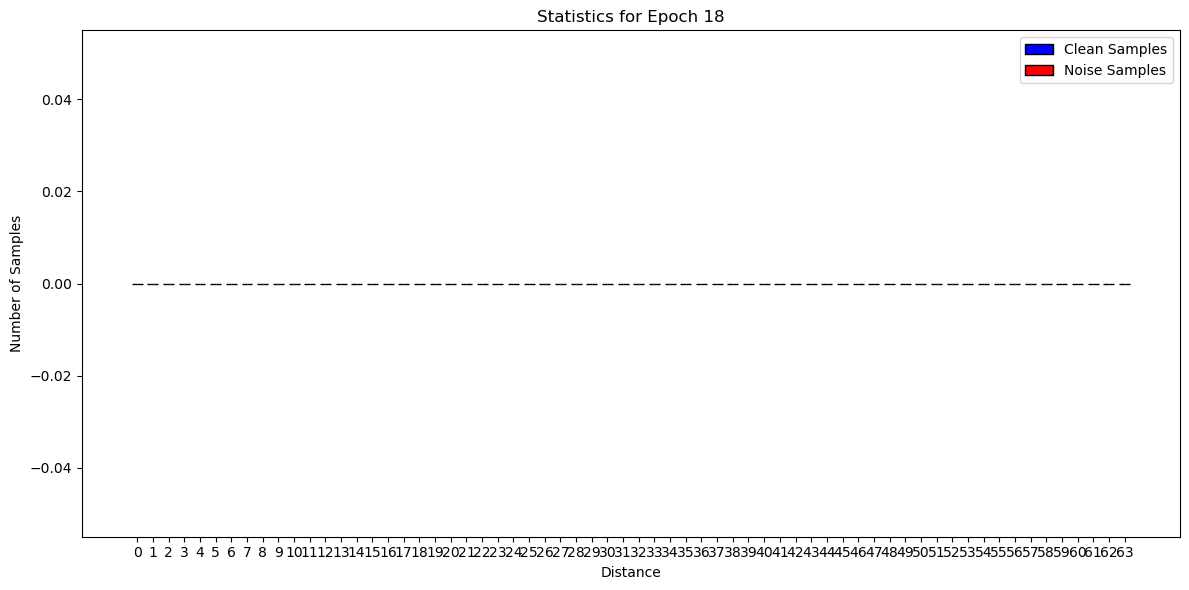

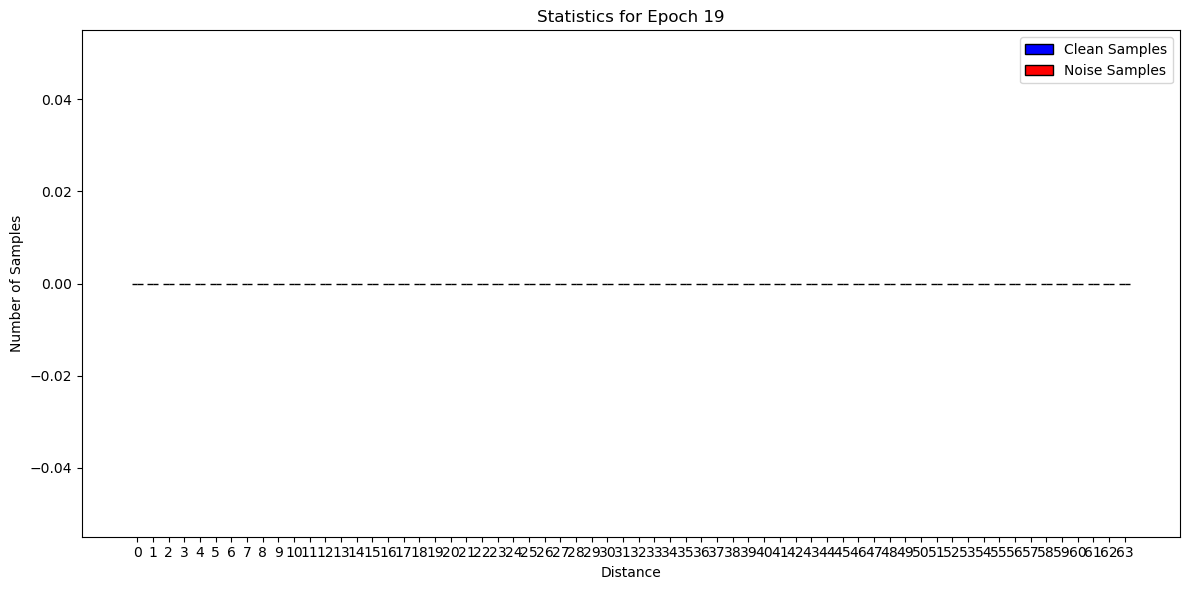

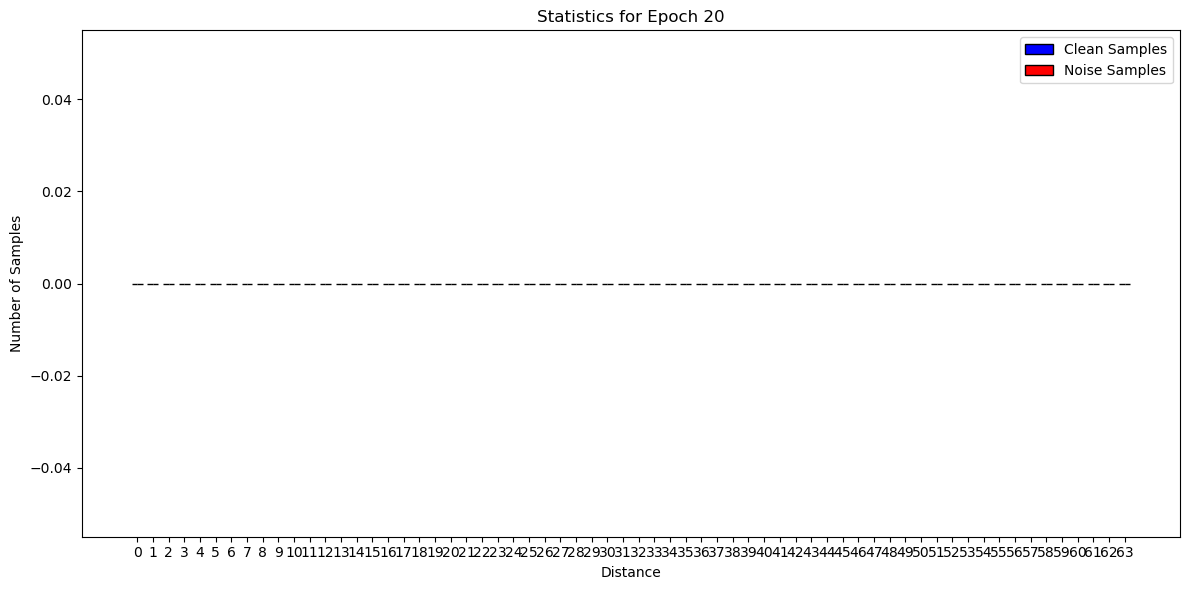

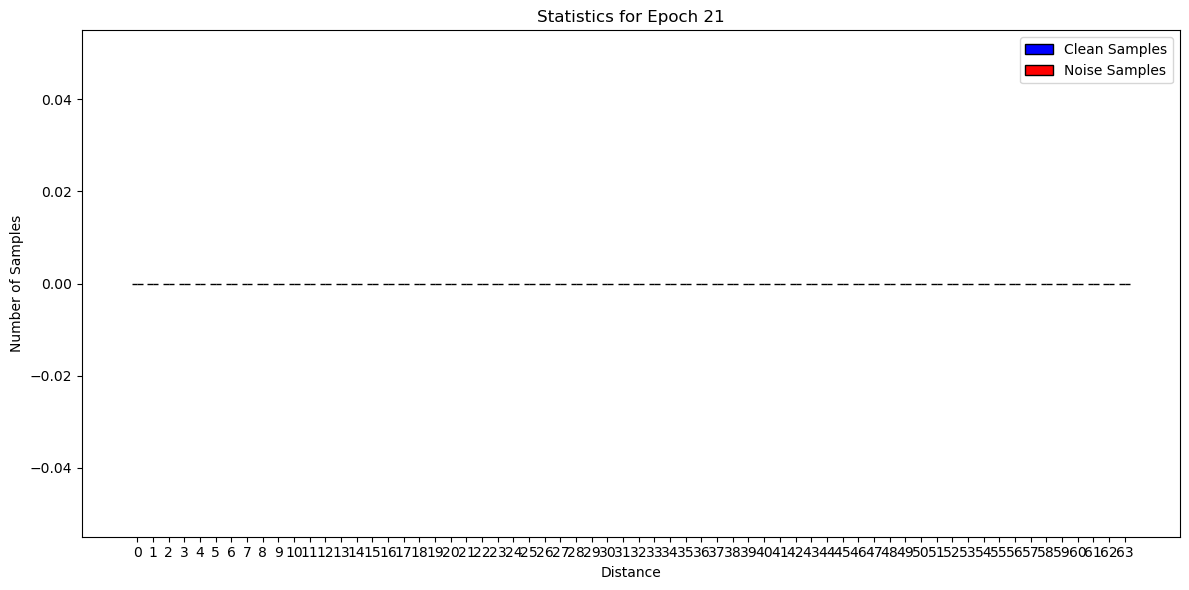

KeyboardInterrupt: 

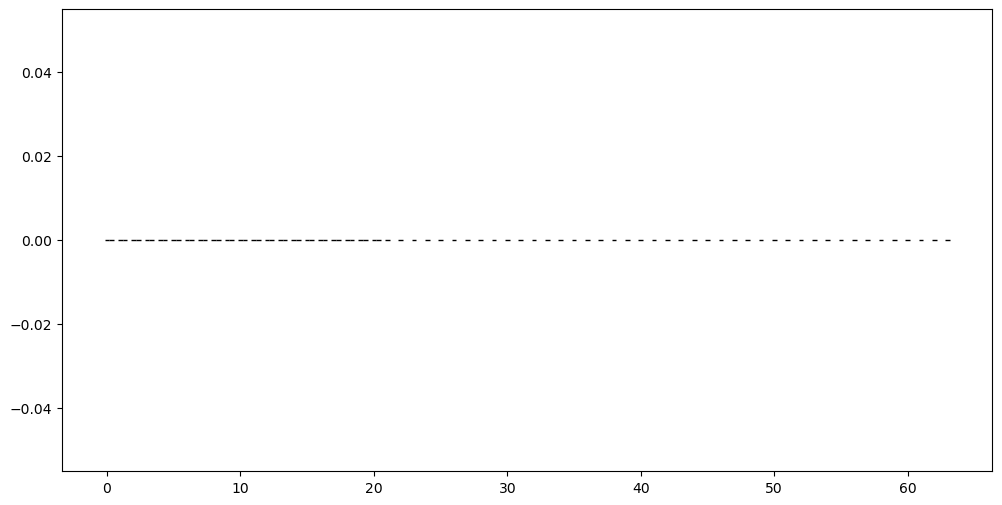

In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_stats_for_epoch(epoch, stats_matrix_path='./sta/distance_matrix_asym_0.4.pt'):
    stats_matrix = torch.load(stats_matrix_path)
    
    for epoch in range(stats_matrix.size(0)):
        # 获取指定epoch的数据
        clean_samples = stats_matrix[epoch, :, 0].numpy()
        noise_samples = stats_matrix[epoch, :, 1].numpy()

        # 计算每个条形的位置
        n_groups = stats_matrix.shape[1]
        index = np.arange(n_groups)
        bar_width = 0.35  # 条形的宽度

        # 绘制直方图
        plt.figure(figsize=(12, 6))
        plt.bar(index, clean_samples, bar_width, color='blue', label='Clean Samples', edgecolor='black')
        plt.bar(index + bar_width, noise_samples, bar_width, color='red', label='Noise Samples', edgecolor='black')

        plt.xlabel('Distance')
        plt.ylabel('Number of Samples')
        plt.title(f'Statistics for Epoch {epoch+1}')
        plt.xticks(index + bar_width / 2, index)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Example usage
plot_stats_for_epoch(0)


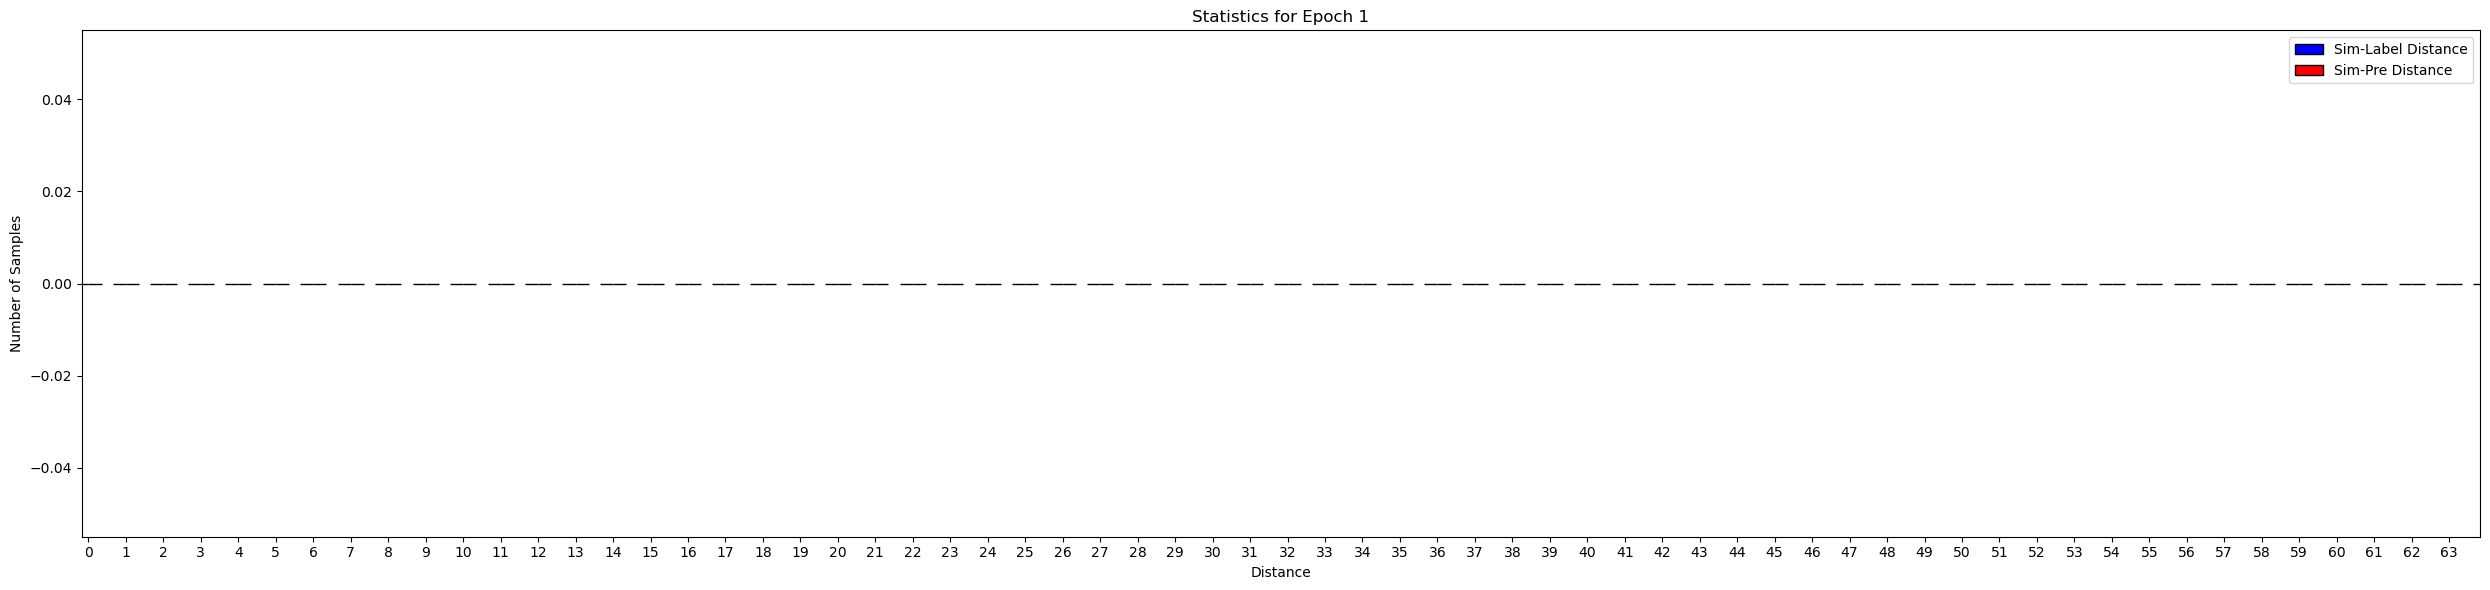

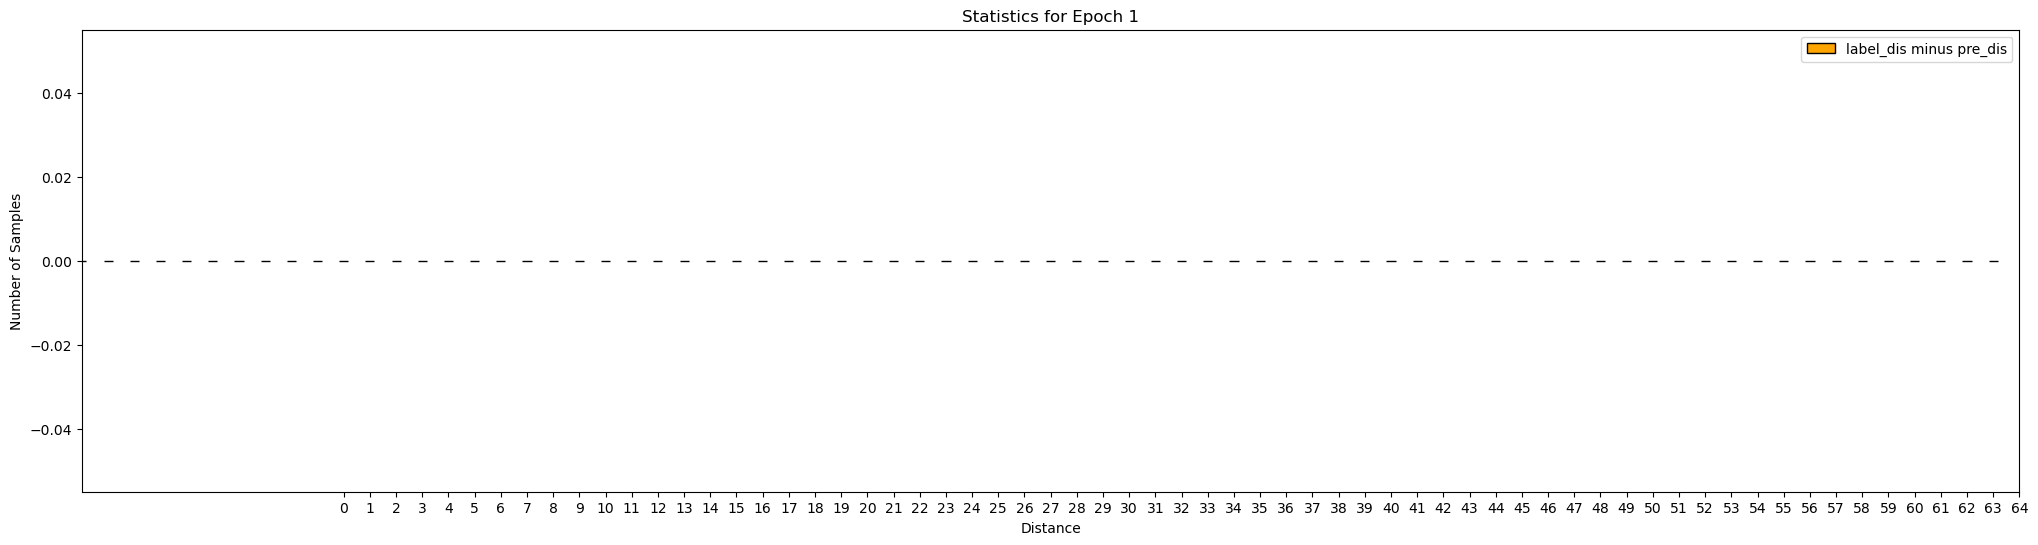

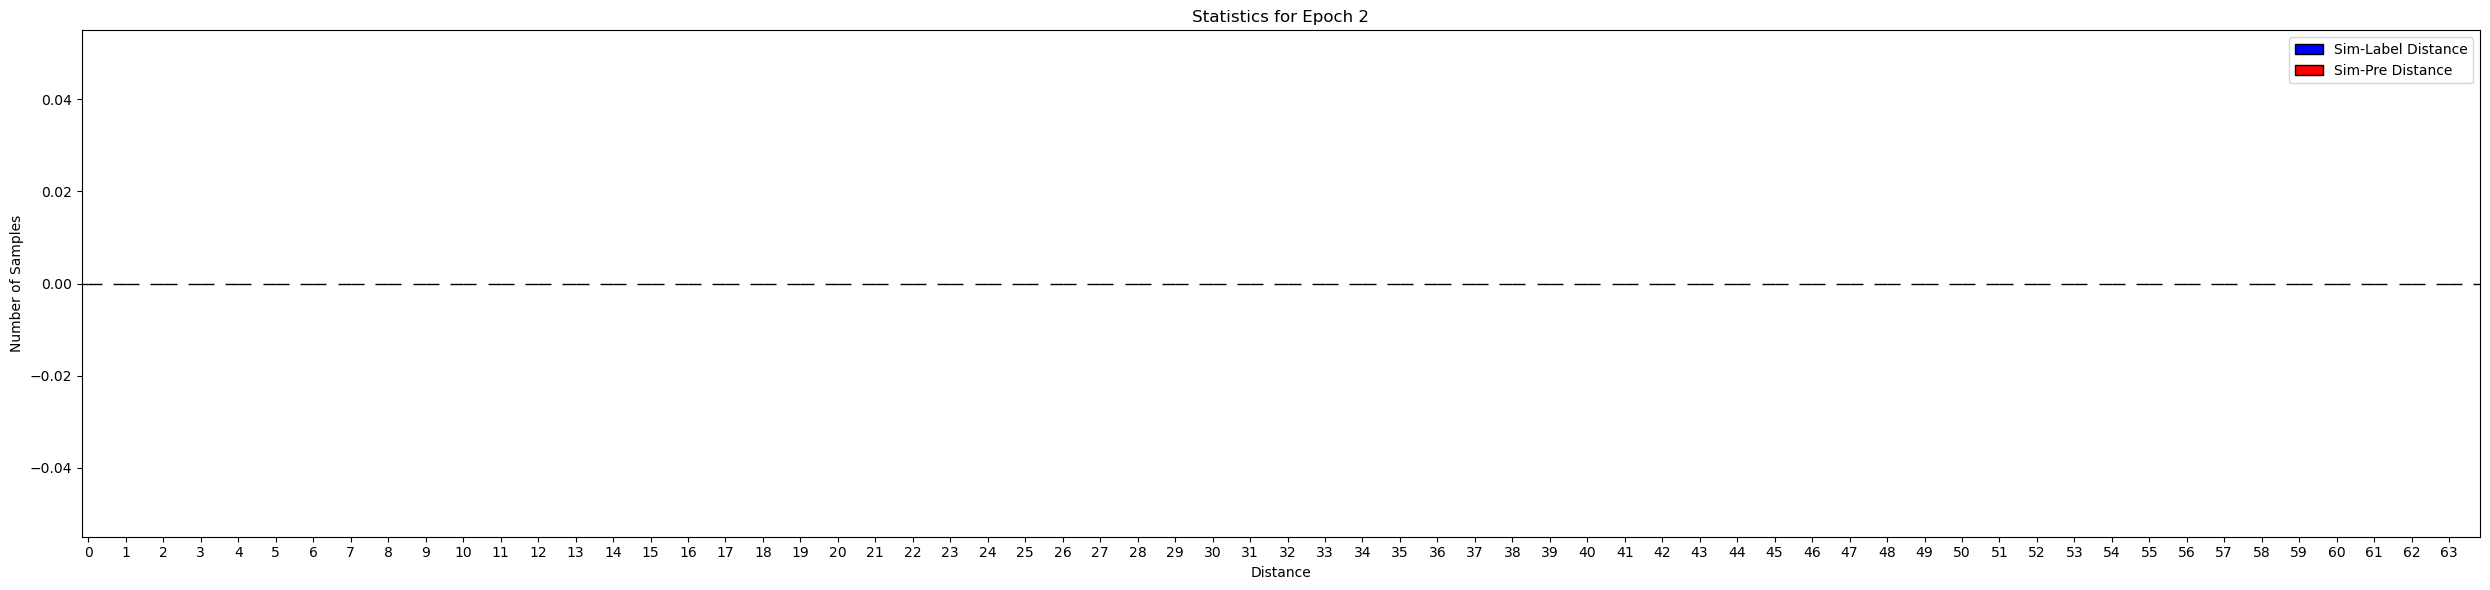

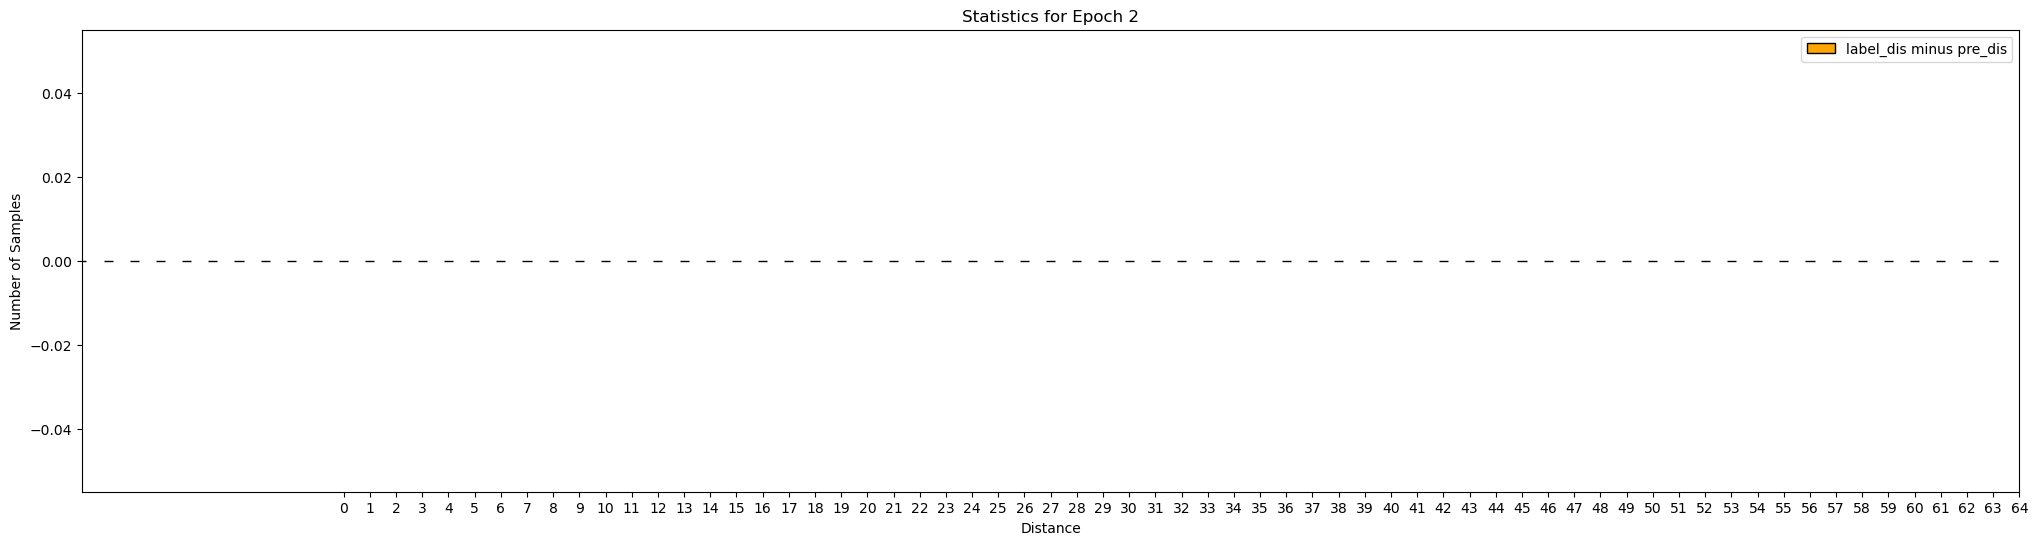

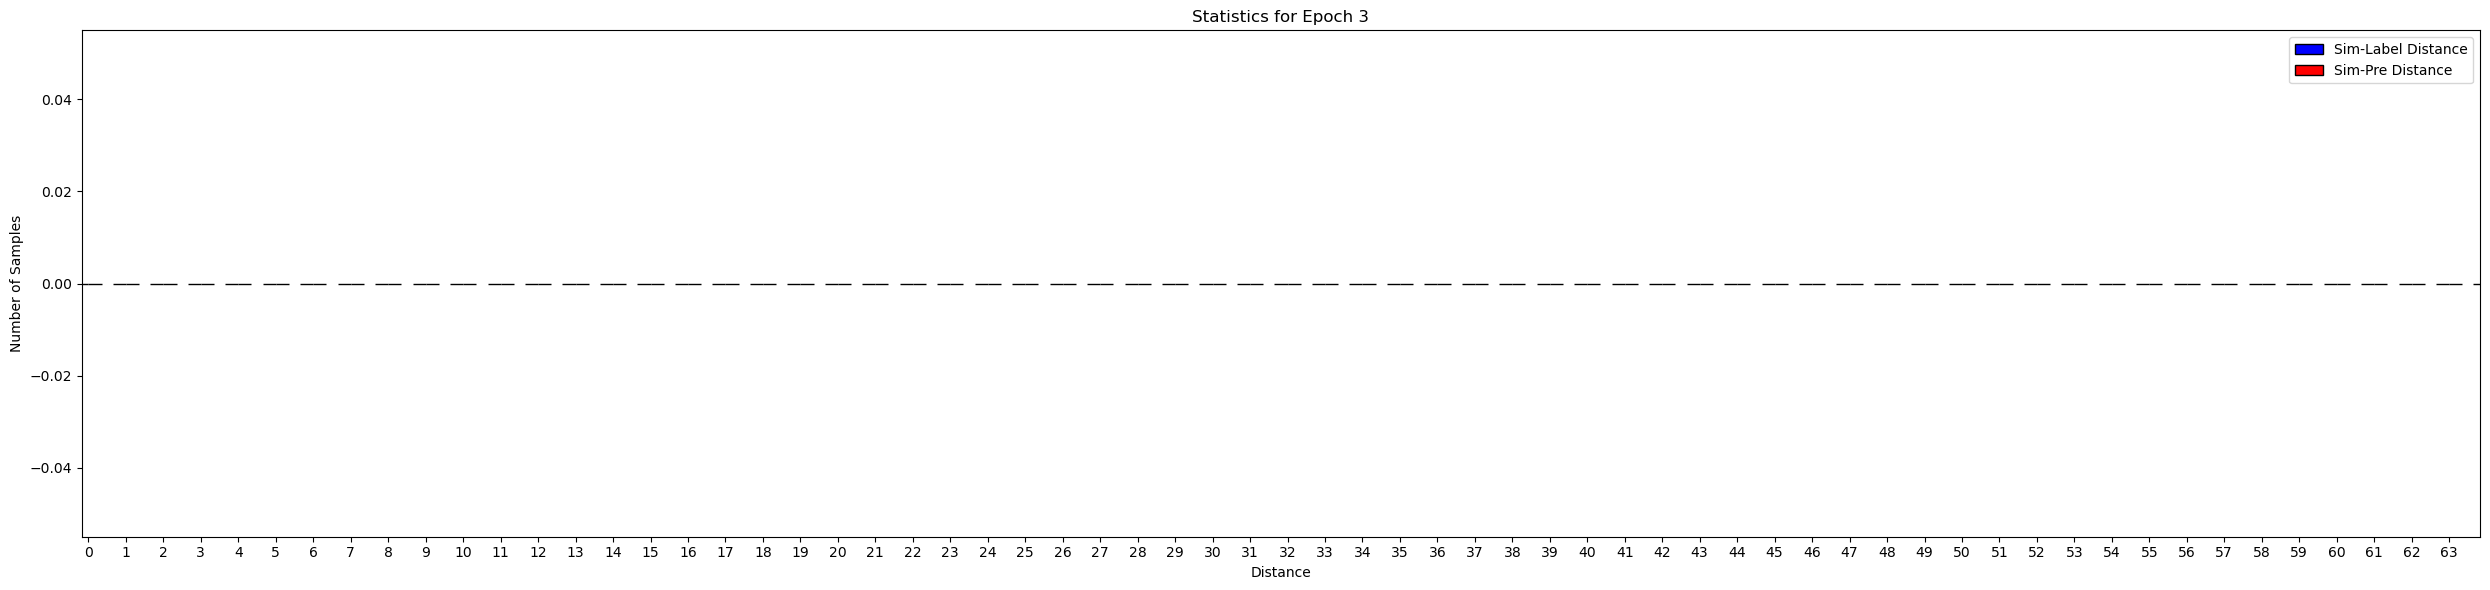

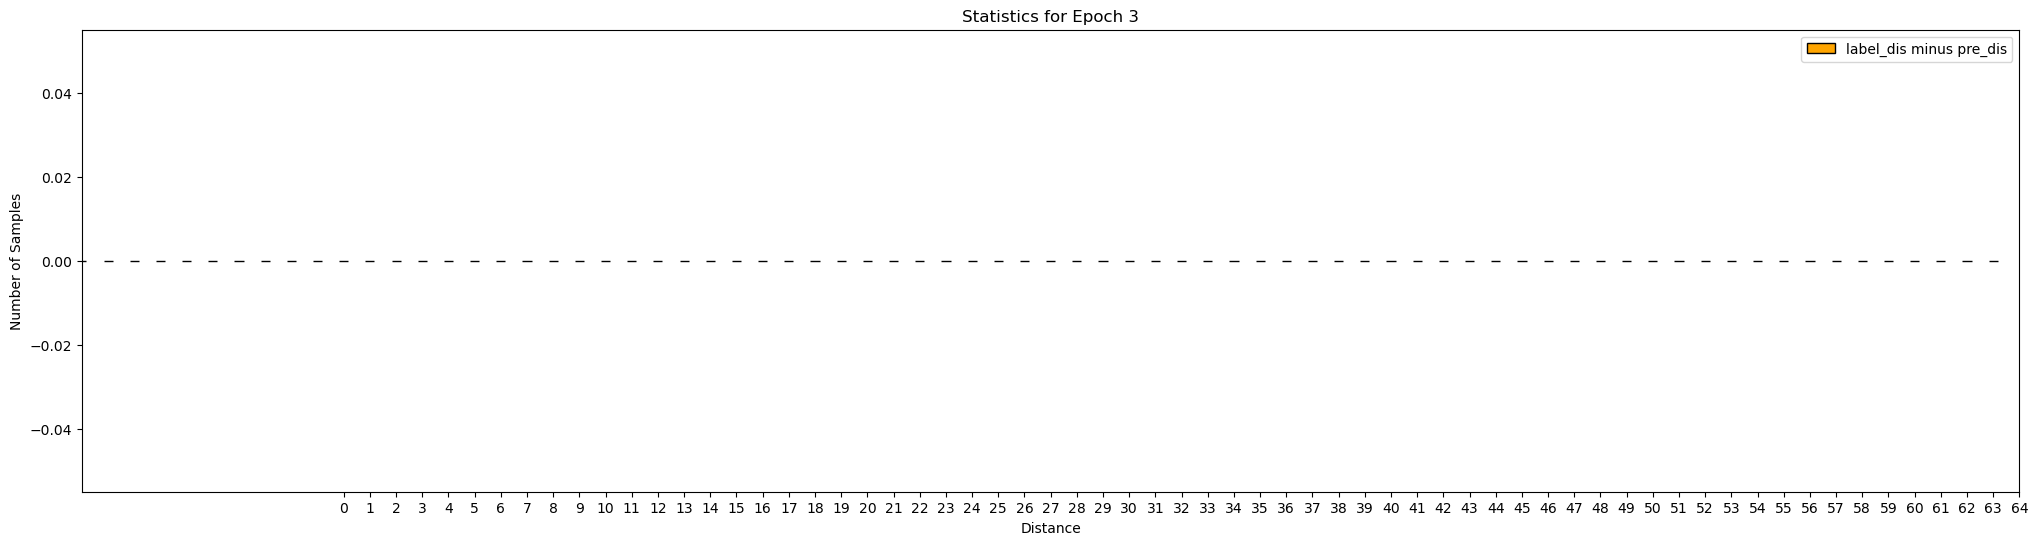

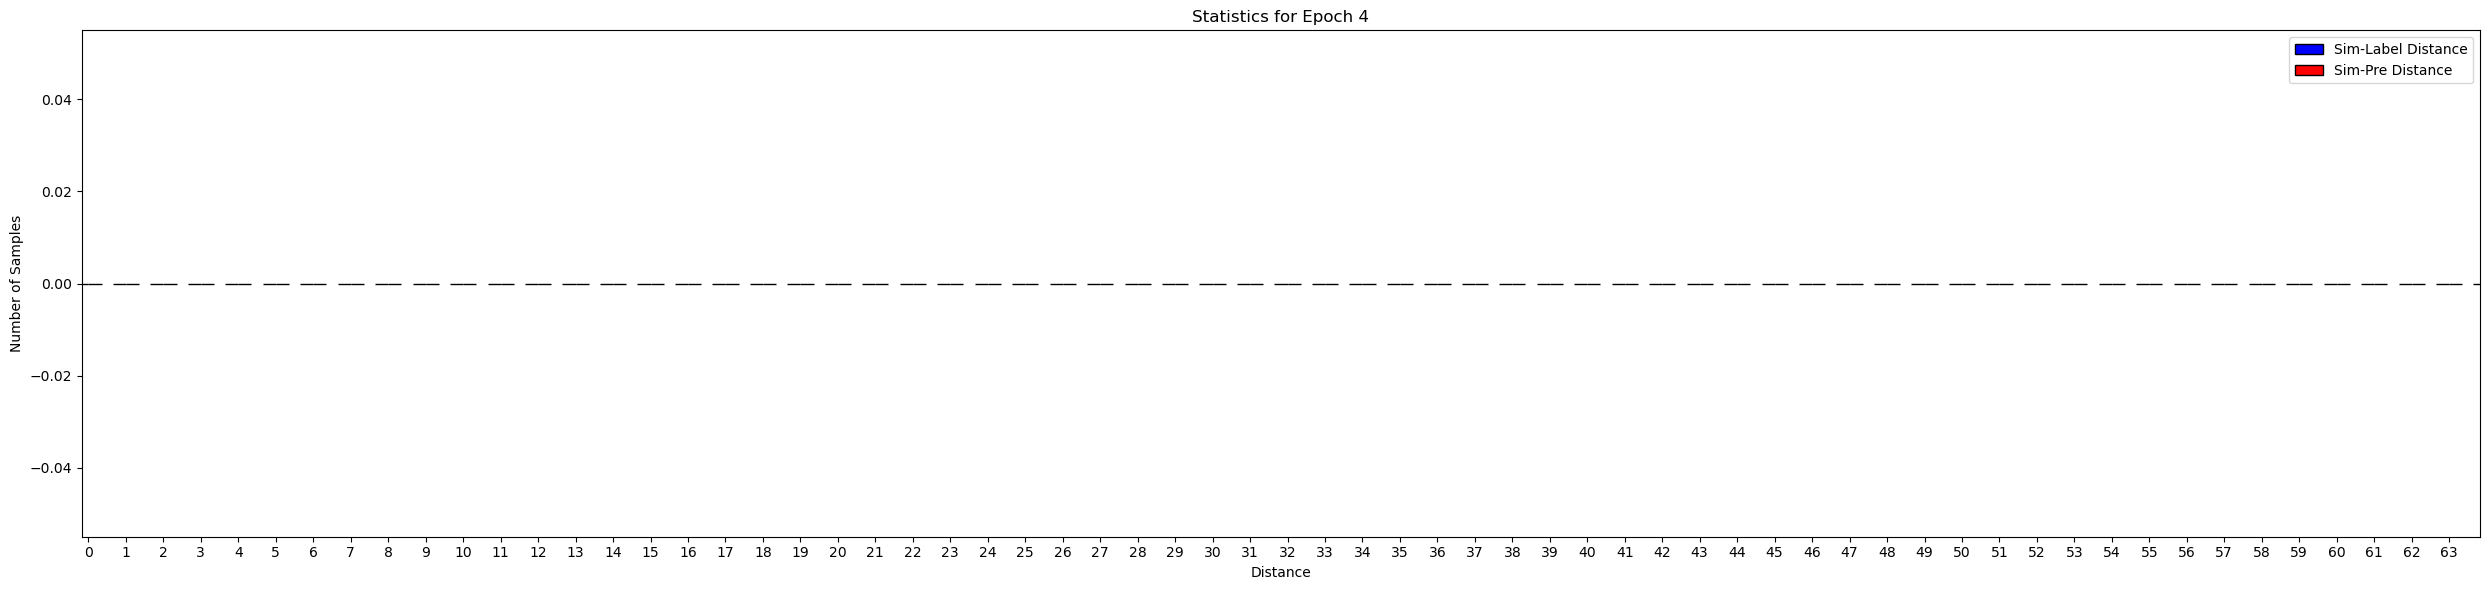

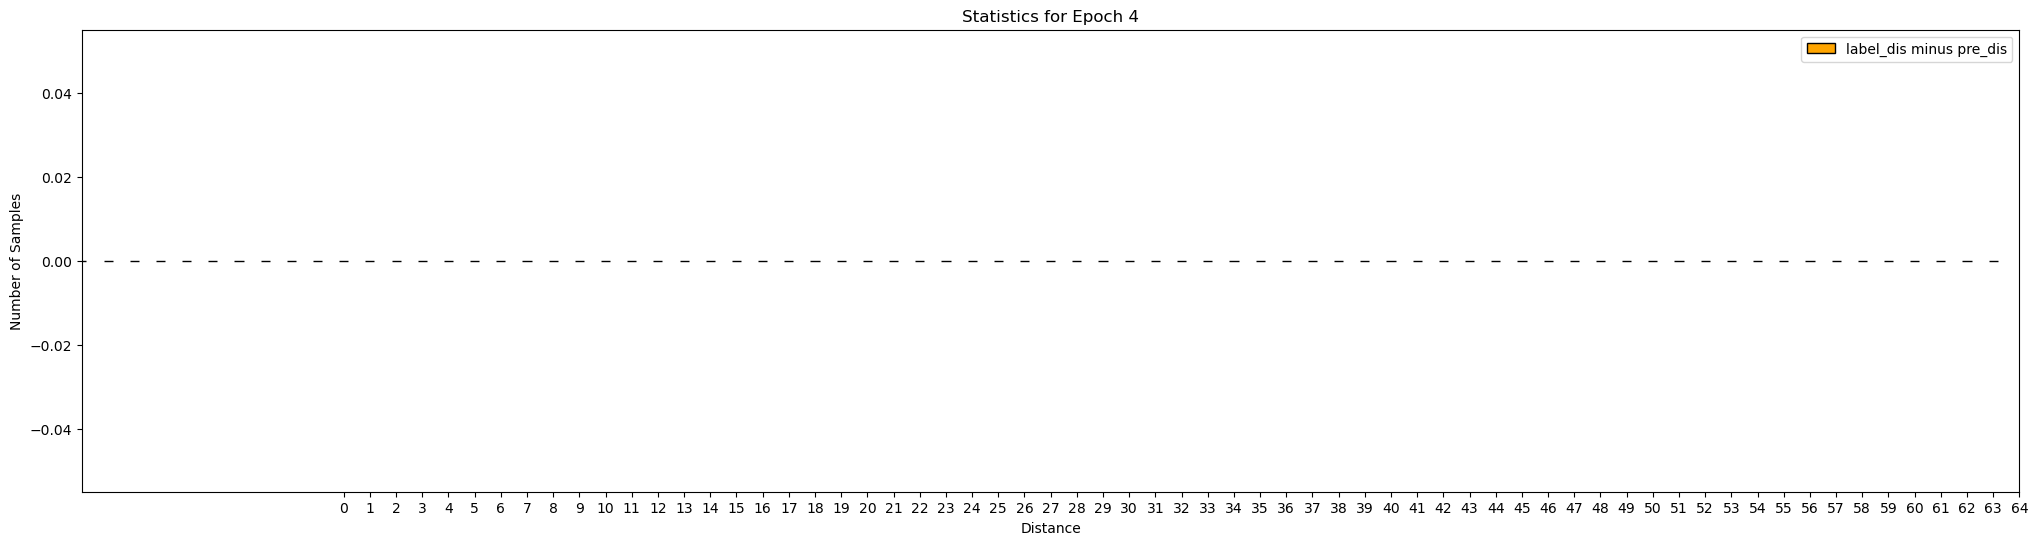

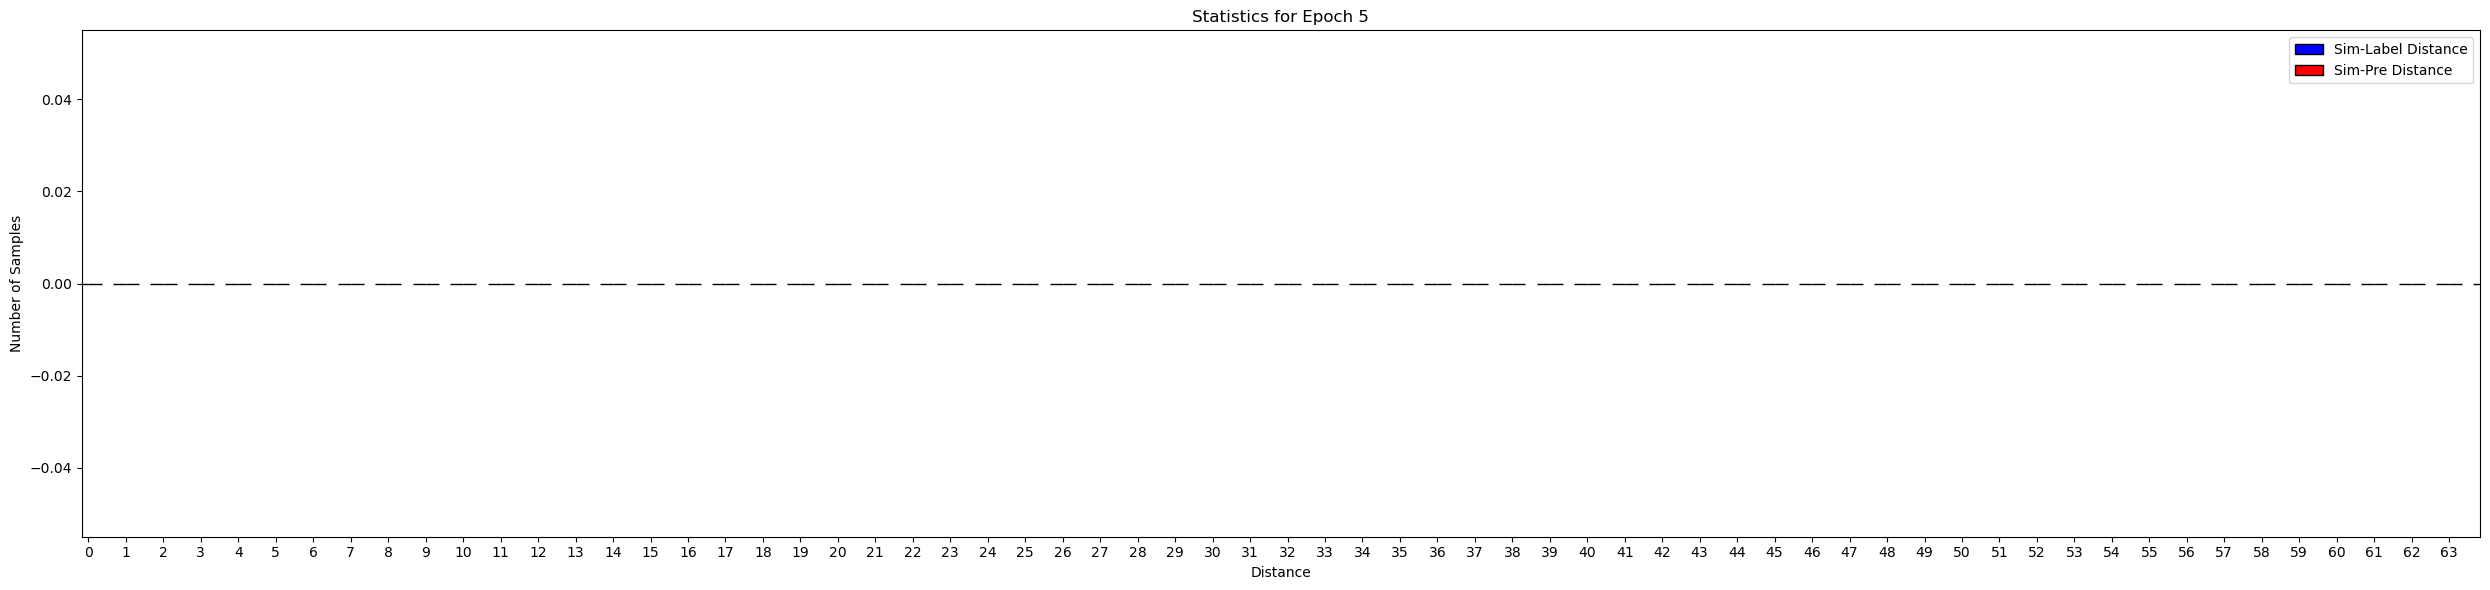

KeyboardInterrupt: 

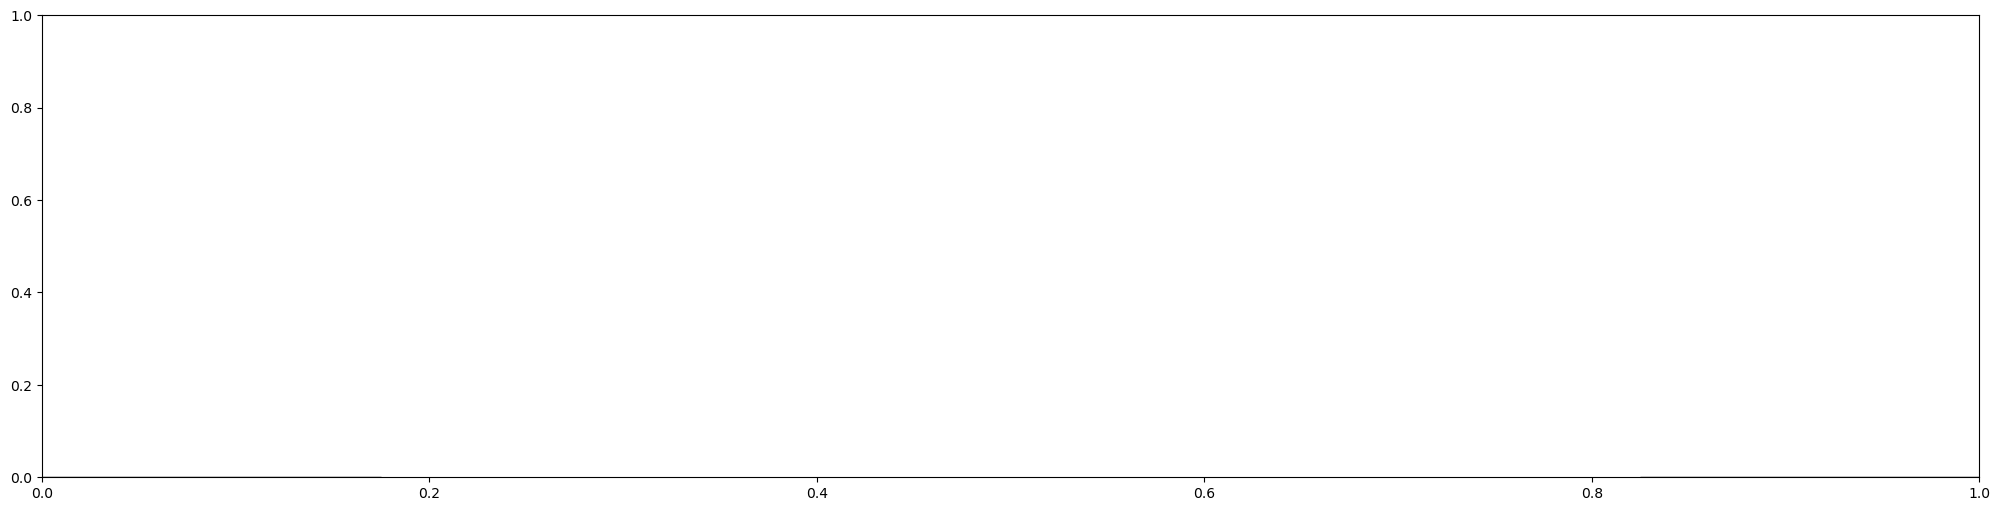

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_stats_for_epoch(epoch, stats_matrix_path='./sta/noise_matrix_sym_0.4.pt'):
    stats_matrix = torch.load(stats_matrix_path)
    
    for epoch in range(stats_matrix.size(0)):
        # 获取指定epoch的数据
        clean_samples = stats_matrix[epoch, :, 0].numpy()
        noise_samples = stats_matrix[epoch, :, 1].numpy()
        diff = stats_matrix[epoch, :, 2].numpy()

        # 计算每个条形的位置
        n_groups = stats_matrix.shape[1]
        index = np.arange(n_groups)
        bar_width = 0.35  # 条形的宽度

        # 绘制直方图
        plt.figure(figsize=(25, 6))
        plt.bar(index, clean_samples, bar_width, color='blue', label='Sim-Label Distance', edgecolor='black')
        plt.bar(index + bar_width, noise_samples, bar_width, color='red', label='Sim-Pre Distance', edgecolor='black')
        #plt.bar(index + 2*bar_width, diff, bar_width, color='orange', label='pre_minus_label', edgecolor='black')

        plt.xlabel('Distance')
        plt.ylabel('Number of Samples')
        plt.title(f'Statistics for Epoch {epoch+1}')
        plt.xticks(index + bar_width / 2, index)
        plt.xlim([0, 64]) 
        plt.legend()

        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(25, 6))
        plt.bar(index-64, diff, bar_width, color='orange', label='label_dis minus pre_dis', edgecolor='black')
        plt.xlabel('Distance')
        plt.ylabel('Number of Samples')
        plt.title(f'Statistics for Epoch {epoch+1}')
        plt.xticks(index , index)
        plt.xlim([-10, 64]) 
        plt.legend()

# Example usage
plot_stats_for_epoch(0)
